In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
import os


In [ ]:
# Define paths and parameters
data_dir = '/kaggle/input/tamil-digit-dataset/TAMIL DIGIT DATASET'
batch_size = 32
num_classes = 9
num_epochs = 20
learning_rate = 0.001


In [ ]:
# Define transformations with augmentations for train and validation sets
train_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to 3 channels if needed
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

valid_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomRotation(10),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

test_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


In [ ]:
# Load the dataset
dataset = ImageFolder(root=data_dir, transform=train_transforms)

# Split dataset into train, validation, and test sets
train_size = int(0.7 * len(dataset))
valid_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - valid_size
train_dataset, valid_dataset, test_dataset = random_split(dataset, [train_size, valid_size, test_size])

# Apply specific transforms to each dataset
train_dataset.dataset.transform = train_transforms
valid_dataset.dataset.transform = valid_transforms
test_dataset.dataset.transform = test_transforms

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [1]:
# Training function
def train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        train_loss, train_correct = 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            train_correct += (preds == labels).sum().item()

        train_loss /= len(train_loader.dataset)
        train_acc = train_correct / len(train_loader.dataset)

        # Validation
        model.eval()
        valid_loss, valid_correct = 0, 0
        with torch.no_grad():
            for images, labels in valid_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                valid_loss += loss.item() * images.size(0)
                _, preds = torch.max(outputs, 1)
                valid_correct += (preds == labels).sum().item()

        valid_loss /= len(valid_loader.dataset)
        valid_acc = valid_correct / len(valid_loader.dataset)

        print(f"Epoch {epoch+1}/{num_epochs}, "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
              f"Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.4f}")


# Testing the model
def test_model(model, test_loader):
    model.eval()
    test_correct = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            test_correct += (preds == labels).sum().item()

    test_acc = test_correct / len(test_loader.dataset)
    print(f"Test Accuracy: {test_acc:.4f}")




In [16]:

# Load a pretrained model and modify the classifier
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Train the model
train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs)



Epoch 1/20, Train Loss: 0.1529, Train Acc: 0.9531, Valid Loss: 0.0884, Valid Acc: 0.9662
Epoch 2/20, Train Loss: 0.0327, Train Acc: 0.9920, Valid Loss: 0.1278, Valid Acc: 0.9609
Epoch 3/20, Train Loss: 0.0193, Train Acc: 0.9962, Valid Loss: 0.0205, Valid Acc: 0.9929
Epoch 4/20, Train Loss: 0.0203, Train Acc: 0.9950, Valid Loss: 0.0265, Valid Acc: 0.9929
Epoch 5/20, Train Loss: 0.0515, Train Acc: 0.9840, Valid Loss: 0.3251, Valid Acc: 0.8808
Epoch 6/20, Train Loss: 0.0406, Train Acc: 0.9878, Valid Loss: 0.2209, Valid Acc: 0.9359
Epoch 7/20, Train Loss: 0.0252, Train Acc: 0.9954, Valid Loss: 0.0067, Valid Acc: 0.9982
Epoch 8/20, Train Loss: 0.0092, Train Acc: 0.9985, Valid Loss: 0.0033, Valid Acc: 0.9982
Epoch 9/20, Train Loss: 0.0109, Train Acc: 0.9989, Valid Loss: 0.0166, Valid Acc: 0.9911
Epoch 10/20, Train Loss: 0.0257, Train Acc: 0.9954, Valid Loss: 0.0254, Valid Acc: 0.9893
Epoch 11/20, Train Loss: 0.0116, Train Acc: 0.9973, Valid Loss: 0.0109, Valid Acc: 0.9947
Epoch 12/20, Train 

In [ ]:
# Evaluate on test set
test_model(model, test_loader)


Class Name: 2


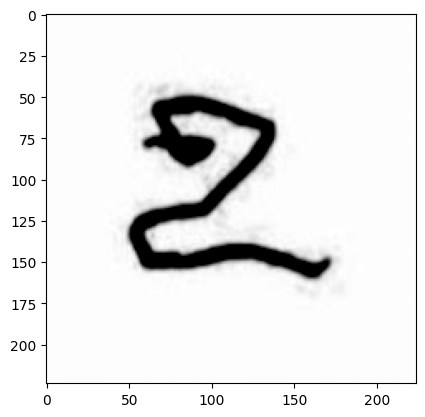

In [39]:
## Passing one image as an input:
from PIL import Image
import matplotlib.pyplot as plt
test_img_path = '/kaggle/input/tamil-digit-dataset/TAMIL DIGIT DATASET/2/006E032F-ECC1-4F32-B89B-523B95FE13B0.jpeg'
test_img = test_transforms(Image.open(test_img_path)).unsqueeze(0).to(device)
pred = model(test_img)
digit_idx = torch.max(pred,1).indices
class_names = [i for i in range(1,10)]
print(f"Class Name: {class_names[digit_idx]}")
plt.imshow(test_img.cpu().squeeze(0).permute(1,2,0));